In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

nsample = 20
x = np.linspace(0, 10, nsample)
x

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

#### 一元线性回归

In [2]:
X = sm.add_constant(x)
X

array([[ 1.        ,  0.        ],
       [ 1.        ,  0.52631579],
       [ 1.        ,  1.05263158],
       [ 1.        ,  1.57894737],
       [ 1.        ,  2.10526316],
       [ 1.        ,  2.63157895],
       [ 1.        ,  3.15789474],
       [ 1.        ,  3.68421053],
       [ 1.        ,  4.21052632],
       [ 1.        ,  4.73684211],
       [ 1.        ,  5.26315789],
       [ 1.        ,  5.78947368],
       [ 1.        ,  6.31578947],
       [ 1.        ,  6.84210526],
       [ 1.        ,  7.36842105],
       [ 1.        ,  7.89473684],
       [ 1.        ,  8.42105263],
       [ 1.        ,  8.94736842],
       [ 1.        ,  9.47368421],
       [ 1.        , 10.        ]])

In [3]:
#β0,β1分别设置成2,5
beta = np.array([2, 5])
beta

array([2, 5])

In [4]:
#误差项
e = np.random.normal(size=nsample)
e

array([ 0.88625766,  0.1027016 ,  1.39257491, -0.42143536, -0.83549335,
        0.10981775,  0.70815285, -1.17120111,  0.2824576 , -0.38909819,
        0.12604699, -0.03275417,  0.63406191,  0.53368778, -0.03234811,
       -2.03441273,  1.80717256, -0.02636848, -0.57381872, -0.40585417])

In [5]:
#实际值y
y = np.dot(X, beta) + e
y

array([ 2.88625766,  4.73428054,  8.6557328 ,  9.47330148, 11.69082244,
       15.26771248, 18.49762653, 19.24985152, 23.33508918, 25.29511234,
       28.44183647, 30.91461425, 34.21300928, 36.74421409, 38.80975715,
       39.43927148, 45.91243572, 46.71047363, 48.79460234, 51.59414583])

In [6]:
#最小二乘法
model = sm.OLS(y,X)

In [7]:
#拟合数据
res = model.fit()

In [8]:
#回归系数
res.params

array([2.28626632, 4.94934821])

In [20]:
#全部结果
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     3668.
Date:                Thu, 01 Mar 2018   Prob (F-statistic):           2.94e-22
Time:                        18:07:03   Log-Likelihood:                -29.947
No. Observations:                  20   AIC:                             63.89
Df Residuals:                      18   BIC:                             65.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4952      0.491      3.043      0.007       0.463       2.527
x1             5.0870      0.084     60.560      0.000       4.911       5.263
==============================================================================
Omnibus:                        0.016   Durbin-Watson:                   2.569
Prob(Omnibus):                  0.992   Jarque-Bera (JB):                0.107
Skew:                          -0.009   Prob(JB):                        0.948
Kurtosis:                       2.641   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
#拟合的估计值
y_ = res.fittedvalues
y_

array([ 2.28626632,  4.89118643,  7.49610654, 10.10102665, 12.70594676,
       15.31086687, 17.91578698, 20.52070709, 23.1256272 , 25.73054731,
       28.33546742, 30.94038753, 33.54530763, 36.15022774, 38.75514785,
       41.36006796, 43.96498807, 46.56990818, 49.17482829, 51.7797484 ])

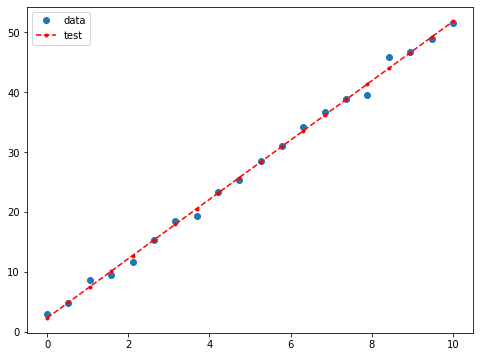

In [10]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label='data')#原始数据
ax.plot(x, y_, 'r--.',label='test')#拟合数据
ax.legend(loc='best')
plt.show()

#### 高阶回归

In [19]:
#Y=5+2⋅X+3⋅X^2
 
nsample = 50
x = np.linspace(0, 10, nsample)
X = np.column_stack((x, x**2))
X = sm.add_constant(X)
X

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.04081633e-01, 4.16493128e-02],
       [1.00000000e+00, 4.08163265e-01, 1.66597251e-01],
       [1.00000000e+00, 6.12244898e-01, 3.74843815e-01],
       [1.00000000e+00, 8.16326531e-01, 6.66389005e-01],
       [1.00000000e+00, 1.02040816e+00, 1.04123282e+00],
       [1.00000000e+00, 1.22448980e+00, 1.49937526e+00],
       [1.00000000e+00, 1.42857143e+00, 2.04081633e+00],
       [1.00000000e+00, 1.63265306e+00, 2.66555602e+00],
       [1.00000000e+00, 1.83673469e+00, 3.37359434e+00],
       [1.00000000e+00, 2.04081633e+00, 4.16493128e+00],
       [1.00000000e+00, 2.24489796e+00, 5.03956685e+00],
       [1.00000000e+00, 2.44897959e+00, 5.99750104e+00],
       [1.00000000e+00, 2.65306122e+00, 7.03873386e+00],
       [1.00000000e+00, 2.85714286e+00, 8.16326531e+00],
       [1.00000000e+00, 3.06122449e+00, 9.37109538e+00],
       [1.00000000e+00, 3.26530612e+00, 1.06622241e+01],
       [1.00000000e+00, 3.46938

In [20]:
beta = np.array([5, 2, 3])
e = np.random.normal(size=nsample)
y = np.dot(X, beta) + e
model = sm.OLS(y,X)
results = model.fit()
results.params

array([5.29839571, 1.93628561, 3.00106316])

In [21]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.536e+05
Date:                Thu, 08 Aug 2019   Prob (F-statistic):           2.17e-90
Time:                        10:02:54   Log-Likelihood:                -80.012
No. Observations:                  50   AIC:                             166.0
Df Residuals:                      47   BIC:                             171.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2984      0.504     10.507      0.000       4.284       6.313
x1             1.9363      0.233      8.303      0.000       1.467       2.405
x2             3.0011      0.023    133.066      0.000       2.956       3.046
==============================================================================
Omnibus:                        2.724   Durbin-Watson:                   2.201
Prob(Omnibus):                  0.256   Jarque-Bera (JB):                2.317
Skew:                           0.526   Prob(JB):                        0.314
Kurtosis:                       2.928   Cond. No.                         142.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

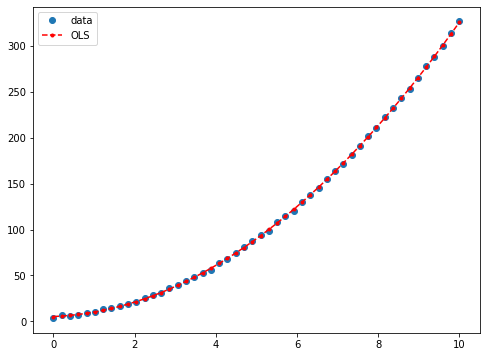

In [14]:
y_fitted = results.fittedvalues
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label='data')
ax.plot(x, y_fitted, 'r--.',label='OLS')
ax.legend(loc='best')
plt.show()

#### 分类变量

假设分类变量有4个取值（a,b,c）,比如考试成绩有3个等级。那么a就是（1,0,0），b（0,1,0），c(0,0,1),这个时候就需要3个系数β0,β1,β2，也就是β0x0+β1x1+β2x2

In [15]:
nsample = 50
groups = np.zeros(nsample,int)
groups

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [16]:
groups[20:40] = 1
groups[40:] = 2
dummy = sm.categorical(groups, drop=True)
dummy

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

In [17]:
#Y=5+2X+3Z1+6⋅Z2+9⋅Z3.
 
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, dummy))
X = sm.add_constant(X)
beta = [5, 2, 3, 6, 9]
e = np.random.normal(size=nsample)
y = np.dot(X, beta) + e
result = sm.OLS(y,X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     4725.
Date:                Thu, 08 Aug 2019   Prob (F-statistic):           2.92e-57
Time:                        09:53:12   Log-Likelihood:                -59.639
No. Observations:                  50   AIC:                             127.3
Df Residuals:                      46   BIC:                             134.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4223      0.471     15.754      0.000       6.474       8.371
x1             2.0970      0.054     38.686      0.000       1.988       2.206
x2             0.1913      0.299      0.640      0.525      -0.410       0.793
x3             2.1371      0.250      8.559      0.000       1.634       2.640
x4             5.0938      0.563      9.055      0.000       3.962       6.226
==============================================================================
Omnibus:                        1.288   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.525   Jarque-Bera (JB):                1.261
Skew:                           0.356   Prob(JB):                        0.532
Kurtosis:                       2.687   Cond. No.                     1.28e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.16e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

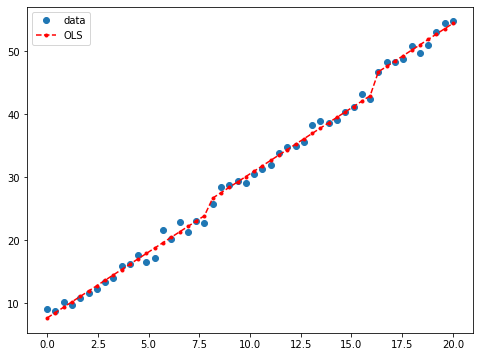

In [18]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="data")
ax.plot(x, result.fittedvalues, 'r--.', label="OLS")
ax.legend(loc='best')
plt.show()